# Correlation matrix analysis

## Import libraries

In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg

import cv2
from keras.utils.vis_utils import plot_model

from google.colab.patches import cv2_imshow



import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate


from sklearn.model_selection import GridSearchCV



from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA, KernelPCA

from sklearn.neural_network import MLPRegressor
import pickle
from seaborn import regplot

## Load data

Here is the dataset corresponding to the data for the month of January.

In [17]:
datos=pd.read_excel("/content/drive/MyDrive/Proyecto grado Privado Luis/PruebaCorrelacion.xlsx")

# select the variables and create a new array
data=datos[['Hora','CL','CC','CO','CA']]
# make the changes, since you want to find the correlation between 
# the cycles and the variation of the variables
data['var_temp']=datos['Temp']-datos['Temp_n1']
data['var_tds']=(datos['TDS']-datos['TDS_n1'])


<ipython-input-17-7f219f144e8e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['var_temp']=datos['Temp']-datos['Temp_n1']
<ipython-input-17-7f219f144e8e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['var_tds']=(datos['TDS']-datos['TDS_n1'])


## Correlation matrix calculation

In [18]:
arr_cov=data.corr()
print(arr_cov)

              Hora        CL        CC        CO        CA  var_temp   var_tds
Hora      1.000000 -0.059234  0.322688 -0.378370  0.382764 -0.208572  0.274580
CL       -0.059234  1.000000  0.076402 -0.076980  0.052721  0.023299 -0.179844
CC        0.322688  0.076402  1.000000 -0.850958  0.938143  0.207927  0.175910
CO       -0.378370 -0.076980 -0.850958  1.000000 -0.817135 -0.211996 -0.128966
CA        0.382764  0.052721  0.938143 -0.817135  1.000000  0.158849  0.182371
var_temp -0.208572  0.023299  0.207927 -0.211996  0.158849  1.000000 -0.069258
var_tds   0.274580 -0.179844  0.175910 -0.128966  0.182371 -0.069258  1.000000


## Color map correlation matrix graph

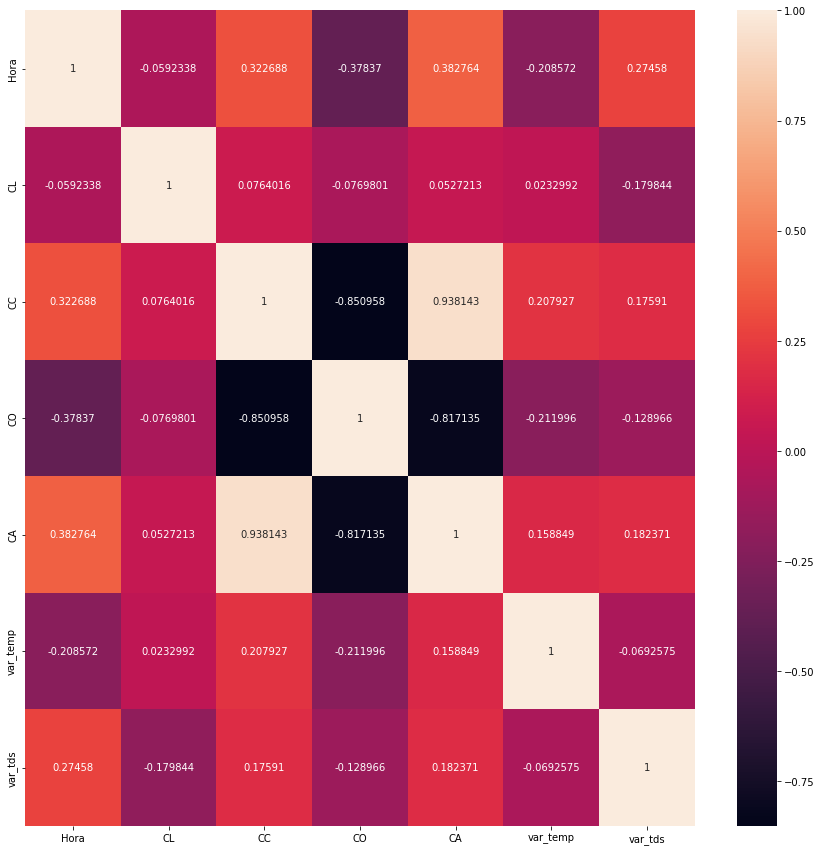

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

labs = ['Hora','CL','CC','CO','CA','var_temp','var_tds']
f, ax = plt.subplots(figsize=(15,15))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap (arr_cov, annot = True, fmt = 'g', xticklabels = labs, yticklabels = labs)
plt.show ()